In [97]:
from neuron import h
h.load_file('stdrun.hoc')
import numpy as np
import matplotlib.pyplot as plt
from stellate import Stellate
h.celsius = 37.0
h.dt = 0.025

In [141]:
stellate_0 = Stellate(0)
stell_theta_ic = h.IClamp(stellate_0.soma(0.5))
stellate_noise_ic = h.IClamp(stellate_0.soma(0.5))
stellate_noise_ic.dur = 1e9
stell_theta_ic.dur = 1e9

time_dur = 5000  # ms

mean, std = -1e-3, 1e-4
noise_arr = np.random.normal(mean,std, int(time_dur / h.dt))
noise_vec = h.Vector(noise_arr)
noise_vec.play(stellate_noise_ic._ref_amp, h.dt)  

theta_amp = 1e-3
theta_freq = 10.0
theta_arr = theta_amp * np.sin(2 * np.pi * theta_freq * np.arange(0, time_dur, h.dt) / 1000)
theta_vec = h.Vector(theta_arr)
theta_vec.play(stell_theta_ic._ref_amp, h.dt)

nc_stell = h.NetCon(stellate_0.soma(0.5)._ref_v, None, sec=stellate_0.soma)
nc_stell.threshold = 0
spike_times_stell = h.Vector()
nc_stell.record(spike_times_stell)

stell_v = h.Vector().record(stellate_0.soma(0.5)._ref_v)
stellate_gh_vec = h.Vector().record(stellate_0.soma(0.5).stellate_mech._ref_gh)
noise_input = h.Vector().record(stellate_noise_ic._ref_amp)
theta_input = h.Vector().record(stell_theta_ic._ref_amp)
time = h.Vector().record(h._ref_t)



ValueError: x and y must have same first dimension, but have shapes (0,) and (200000,)

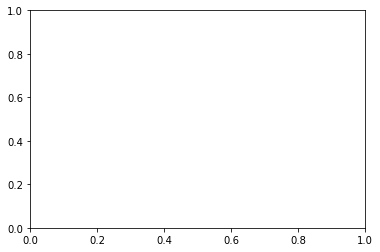

In [119]:
plt.plot(time.to_python()[1:],theta_arr)

In [142]:
h.finitialize(-65)
h.continuerun(time_dur)



0.0

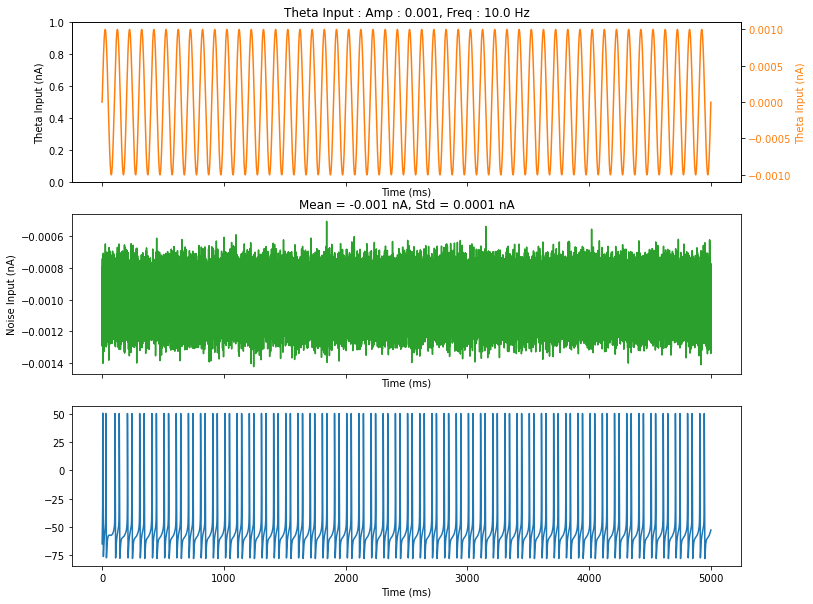

In [143]:

fig,ax = plt.subplots(3,1,figsize=(12, 10), sharex=True)
ax1 = ax[0].twinx()
ax1.plot(time, theta_input.to_python(), color='C1', label='Theta Input')
ax1.set_ylabel("Theta Input (nA)", color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
#plt.plot(time,noise_input.to_python())
ax[2].plot(time, stell_v.to_python())
ax[0].set_xlabel("Time (ms)")
ax[2].set_xlabel("Time (ms)")
ax[1].set_xlabel("Time (ms)")
ax[0].set_ylabel("Theta Input (nA)")
ax[1].set_ylabel("Noise Input (nA)")
ax[0].set_title(f"Theta Input : Amp : {theta_amp}, Freq : {theta_freq:.1f} Hz")
ax[1].set_title(f"Mean = {mean} nA, Std = {std} nA")
ax[1].plot(time,noise_input.to_python(), color='C2', label='Noise Input')
plt.show()

In [144]:
spike_times_array = spike_times_stell.to_python()
print("Spike times (ms):", spike_times_array)
print("Interspike intervals (ms):", np.diff(spike_times_array))

Spike times (ms): [4.600000000100032, 29.675000000098848, 105.15000000011534, 140.12500000010948, 207.45000000004825, 243.8000000000152, 307.94999999995684, 344.67499999992344, 408.1749999998657, 445.04999999983215, 508.1999999997747, 545.199999999892, 608.2000000001212, 645.0750000002554, 708.3000000004854, 745.2750000006199, 808.250000000849, 845.3250000009839, 908.3500000012132, 945.3000000013476, 1008.3250000015769, 1045.3000000017114, 1108.3250000019407, 1145.3750000020755, 1208.450000002305, 1245.55000000244, 1308.4000000026685, 1345.5000000028035, 1408.4250000030324, 1445.3500000031668, 1508.4000000033961, 1545.6500000035317, 1608.40000000376, 1645.6250000038954, 1708.4250000041238, 1745.5250000042588, 1808.3750000044874, 1845.4000000046221, 1908.4500000048515, 1945.5750000049866, 2008.4750000052154, 2045.6750000053507, 2108.42500000448, 2145.6250000039386, 2208.4250000030247, 2245.4750000024856, 2308.3500000015706, 2345.4500000010307, 2408.4250000001143, 2445.5249999995744, 250

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


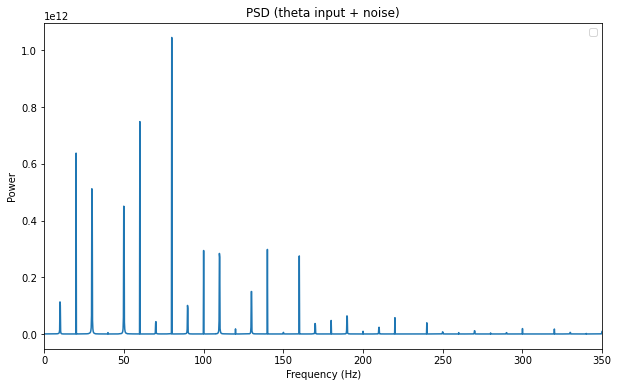

In [147]:
import analysis_utils as a_utils

fft_freq,fft_sig,fft_power = a_utils.calc_fft(stell_v.to_python()[10000:])
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, fft_power)
plt.xlim(0, 350)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
#plt.axvline(x=1000/37.1, color='r', linestyle='--', label=f'Dominant Frequency: {1000/37.1:.2f} Hz  ')
#plt.axvline(x=1000/62.825, color='r', linestyle='--', label=f'Dominant Frequency: {1000/62.825:.2f} Hz  ')
plt.title("PSD (theta input + noise)")
plt.legend()
plt.show()